# 주제 : 롤 좀 하니? '이것'만 하면 무조건 이긴다!<br> - 데이터로 알아보는 리그 오브 레전드의 승리 공식
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 League of Legends Diamond Ranked Games (10 min) 데이터셋을 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    high_diamond_ranked_10min.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    gameId: 게임 판의 고유 ID
    blueWins: 블루팀의 승리 여부 (0: 패배, 1: 승리)
    xxxWardsPlaced: xxx팀에서 설치한 와드의 수 
    xxxWardsDestroyed: xxx팀에서 파괴한 와드의 수
    xxxFirstBlood: xxx팀의 첫번째 킬 달성 여부
    xxxKills: xxx팀의 킬 수
    xxxDeaths: xxx팀의 죽음 수
    xxxAssists: xxx팀의 어시스트 수
    xxxEliteMonsters: xxx팀이 죽인 엘리트 몬스터 수
    xxxDragons: xxx팀이 죽인 용의 수
    xxxHeralds: xxx팀이 죽인 전령의 수
    xxxTowersDestroyed: xxx팀이 파괴한 탑의 수
    xxxTotalGold: xxx팀의 전체 획득 골드
    xxxAvgLevel: xxx팀의 평균 레벨
    xxxTotalExperience: xxx팀의 총 경험치 획득량
    xxxTotalMinionsKilled: xxx팀의 총 미니언 킬 수
    xxxTotalJungleMinionsKilled: xxx팀의 총 정글 미니언 킬 수
    xxxGoldDiff: xxx팀과 다른 팀 간의 골드 획득량 차이
    xxxExperienceDiff: xxx팀과 다른 팀과의 경험치 획득량 차이
    xxxCSPerMin: xxx팀의 분당 CS 스코어
    xxxGoldPerMin: xxx팀의 분당 골드 획득량
      
    
    
- 데이터 출처: https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min

## 최종 목표
    - 일상에서 볼 수 있는 데이터의 활용
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - 학습된 모델로부터 인사이트 습득 방법 이해

- 출제자 : 신제용 강사
---

## Step 0. 리그 오브 레전드 데이터셋

### E-스포츠와 리그 오브 레전드


### 리그 오브 레전드 데이터셋에 관하여


## Step 1. 데이터셋 준비하기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [ ]:
import os

os.environ['KAGGLE_USERNAME'] = 'kimhyoil'
os.environ['KAGGLE_KEY'] = '030ee171929e94ede14fde330ca31a8d'

### 문제 2. 데이터 다운로드 및 압축 해제하기


In [ ]:
!kaggle datasets download -d bobbyscience/league-of-legends-diamond-ranked-games-10-min
!unzip '*.zip'
!ls

  0% 0.00/539k [00:00<?, ?B/s]
100% 539k/539k [00:00<00:00, 36.4MB/s]
Archive:  league-of-legends-diamond-ranked-games-10-min.zip
  inflating: high_diamond_ranked_10min.csv  
high_diamond_ranked_10min.csv			   sample_data
league-of-legends-diamond-ranked-games-10-min.zip


### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [ ]:
df = pd.read_csv('high_diamond_ranked_10min.csv')

## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 데이터프레임의 각 컬럼 분석하기


In [ ]:
# df.head()
df.info()
# df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

### 문제 5. 각 컬럼의 Correlation 히트맵으로 시각화하기


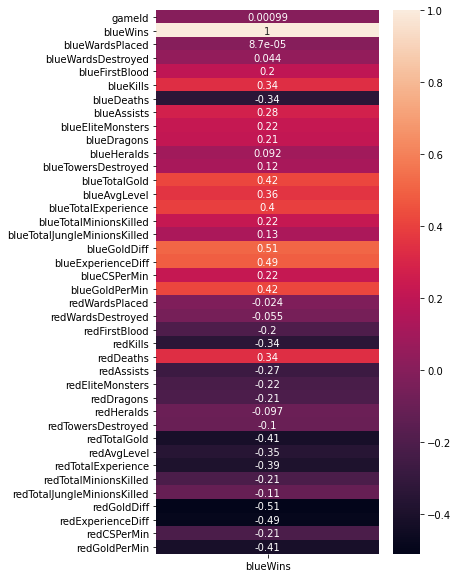

In [ ]:
# DataFrame의 corr() 메소드와 Seaborn의 heatmap() 메소드를 이용하여 Pearson's correlation 시각화하기
# 승리와 가장 관계있는 feature는 총 금액, 골드 차이, 경험치 평균 레벨 등이 있다.
fig = plt.figure(figsize=(5,10))
sns.heatmap(df.corr()[['blueWins']], annot=True)

### 문제 6. 각 컬럼과 승리 여부의 관계 시각화하기


In [ ]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

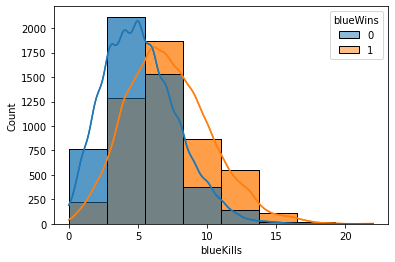

In [ ]:
# KDE: Kernel Density Estimator
# kill(death, assist) 수는 약간의 관계를 지님 KDE: Kernel Density Estimator
# kill(death, assist) 수는 약간의 관계를 지님
sns.histplot(data=df, x='blueKills', hue='blueWins', bins=8, kde=True)
sns.histplot(data=df, x='blueKills', hue='blueWins', bins=8, kde=True)

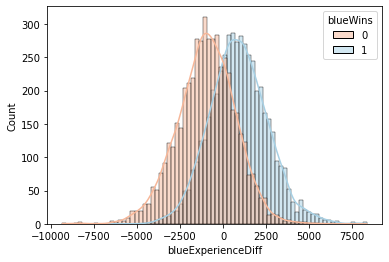

In [ ]:
# 경험치, 미니언, 골드, 레벨 등과 승리는 좋은 상관관계를 지님
# 0을 기준으로 정확하게 정규분포 곡선을 그림 경험치, 미니언, 골드, 레벨 등과 승리는 좋은 상관관계를 지님
sns.histplot(data=df, x='blueExperienceDiff', hue='blueWins', kde=True, palette='RdBu')

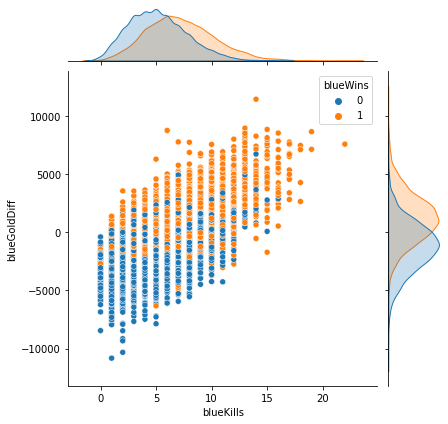

In [ ]:
# 두 피처가 평면에 골고루 분포 되어 있는건 아니지만
# 대각선에 수렴 된 것은 아니고, 두 피처로 인해 승리 유무가 나누어지기 때문에
# 상당히 두 피처는 사용했을 때 좋은 피처가 될 것
sns.jointplot(x='blueKills', y='blueGoldDiff', data=df, hue='blueWins')

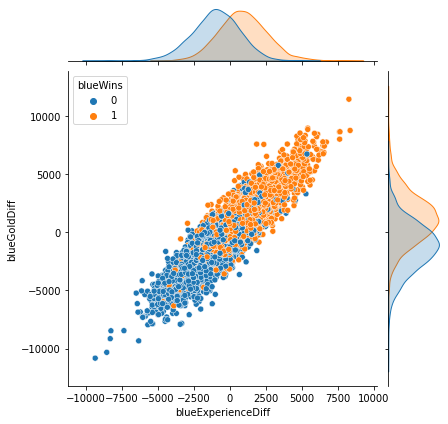

In [ ]:
# 위 그림과 대각선에 수렴한 정도를 비교
sns.jointplot(x='blueExperienceDiff', y='blueGoldDiff', data=df, hue='blueWins')

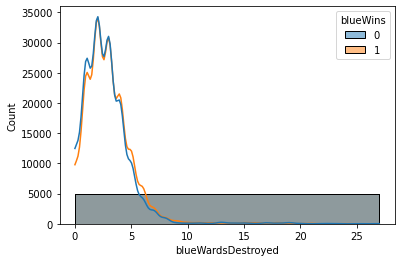

In [ ]:
# 와딩 수와 파괴 수는 영향x
sns.histplot(data=df, x='blueWardsDestroyed', hue='blueWins', bins=1, kde=True)

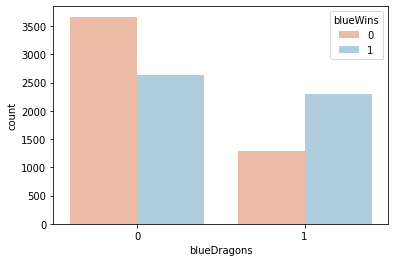

In [ ]:
# 블루팀이 드래곤을 처치한 경우 승리와 양의 관계가 있음 
sns.countplot(x='blueDragons', data=df, hue='blueWins', palette='RdBu')

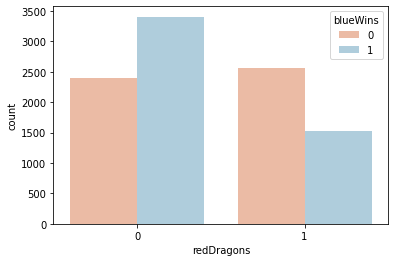

In [ ]:
# 막대 그래프 높이 차가 다름
# 블루팀이 드래곤을 처치한 경우와 레드팀이 드래곤을 처치한 경우가 대칭적이지 않다
sns.countplot(x='redDragons', data=df, hue='blueWins', palette='RdBu')

## Step 3. 모델 학습을 위한 데이터 전처리


### 문제 7. StandardScaler를 이용해 수치형 데이터 표준화하기


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#  Multicollinearity를 피하기 위해 feature 제거
# blueKills&redDeath, blueFirstBlood&redFirstBlood, ...
X_num = df[['blueWardsPlaced', 'blueWardsDestroyed',
            'blueKills', 'blueDeaths', 'blueAssists',
            'blueEliteMonsters','blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
            'blueTotalExperience', 'blueTotalMinionsKilled',
            'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
            'blueCSPerMin', 'blueGoldPerMin',
            'redWardsPlaced', 'redWardsDestroyed','redAssists',
            'redEliteMonsters', 'redDragons', 
            'redTotalGold', 'redAvgLevel', 'redTotalExperience',
            'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 
            'redCSPerMin', 'redGoldPerMin']]    
X_cat = df[['blueFirstBlood', 'blueDragons', 
            'blueHeralds', 'redHeralds', 'redTowersDestroyed']]

scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scaled, X_cat], axis=1)
y = df['blueWins']

In [ ]:
X, y

(      blueWardsPlaced  blueWardsDestroyed  ...  redHeralds  redTowersDestroyed
 0            0.316996           -0.379275  ...           0                   0
 1           -0.570992           -0.839069  ...           1                   1
 2           -0.404494           -1.298863  ...           0                   0
 3            1.149484           -0.839069  ...           0                   0
 4            2.925460            0.540312  ...           0                   0
 ...               ...                 ...  ...         ...                 ...
 9874        -0.293496           -0.379275  ...           0                   0
 9875         1.759976           -1.298863  ...           0                   0
 9876         0.039499           -0.839069  ...           0                   0
 9877        -0.459994            0.540312  ...           0                   0
 9878        -0.237997           -1.298863  ...           0                   0
 
 [9879 rows x 33 columns], 0       0
 

### 문제 8. 학습데이터와 테스트데이터 분리하기


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Step 4. Classification 모델 학습하기


### 문제 9. Logistic Regression 모델 생성/학습하기


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_lr = LogisticRegression(max_iter=50)
model_lr.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 문제 10. 모델 학습 결과 평가하기


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# only blue info
pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))

# both blue&red - 성능 동일

              precision    recall  f1-score   support

           0       0.74      0.75      0.74      1469
           1       0.75      0.74      0.74      1495

    accuracy                           0.74      2964
   macro avg       0.74      0.74      0.74      2964
weighted avg       0.74      0.74      0.74      2964



### 문제 11. XGBoost 모델 생성/학습하기


In [ ]:
from xgboost import XGBClassifier

In [ ]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

### 문제 12. 모델 학습 결과 평가하기


In [ ]:
# both blue&red
pred = model_xgb.predict(X_test)
print(classification_report(y_test, pred))

# only blue info
# 성능 동일

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1469
           1       0.74      0.74      0.74      1495

    accuracy                           0.74      2964
   macro avg       0.74      0.74      0.74      2964
weighted avg       0.74      0.74      0.74      2964



## Step5 모델 학습 결과 심화 분석하기


### 문제 13. Logistic Regression 모델 계수로 상관성 파악하기

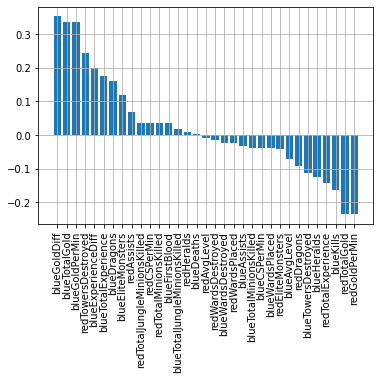

In [ ]:
model_coef = pd.DataFrame(data=model_lr.coef_[0], index=X.columns, columns=['Model Coef'])
model_coef.sort_values(by='Model Coef', ascending=False,inplace=True)
plt.bar(model_coef.index, model_coef['Model Coef'])
plt.grid()
plt.xticks(rotation=90)
plt.show()

### 문제 14. XGBoost 모델로 특징의 중요도 확인하기

In [ ]:
model_xgb.feature_importances_

array([0.01826954, 0.01438335, 0.02440929, 0.01467654, 0.02146448,
       0.01842767, 0.01666142, 0.02490551, 0.01580453, 0.0224834 ,
       0.01760324, 0.02309546, 0.36865628, 0.10828817, 0.        ,
       0.        , 0.01456113, 0.01937402, 0.02729507, 0.03263025,
       0.04498589, 0.02870856, 0.        , 0.02135858, 0.01755783,
       0.01756834, 0.        , 0.        , 0.        , 0.0570925 ,
       0.00275264, 0.00698631, 0.        ], dtype=float32)

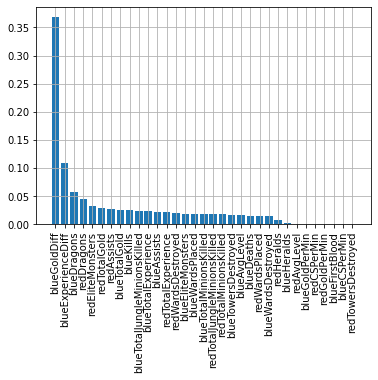

In [ ]:
model_coef = pd.DataFrame(data=model_xgb.feature_importances_, index=X.columns, columns=['Model Coef'])
model_coef.sort_values(by='Model Coef', ascending=False,inplace=True)
plt.bar(model_coef.index, model_coef['Model Coef'])
plt.grid()
plt.xticks(rotation=90)
plt.show()

<BarContainer object of 33 artists>

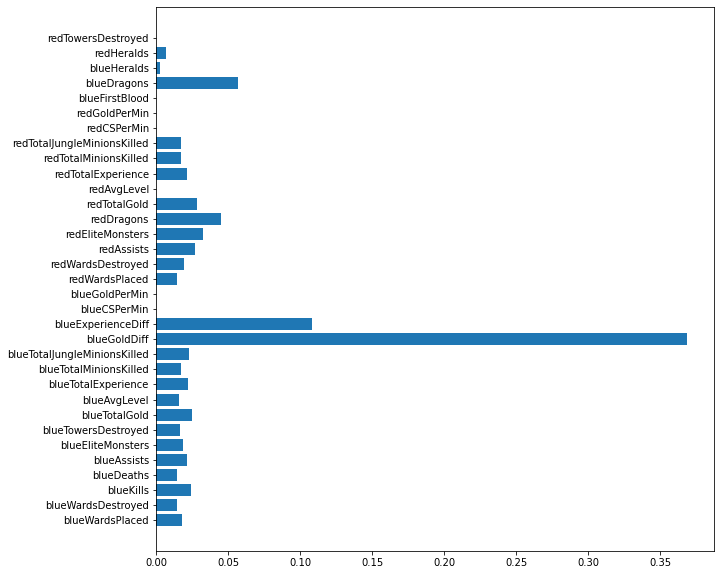

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.barh(X.columns, model_xgb.feature_importances_)


